## What is this?
Creating a fake dataset by putting some object at random places of the sky.  
*Output size* : 128 x 128

## Imports

In [1]:
# Importing a bunch of stuff
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, gaussian_filter, uniform_filter
from scipy import stats

from torchvision import transforms, datasets
from torch.utils.data import DataLoader


import healpy as hp
from PIL import Image

## Some important constants

In [9]:
N_SIDE = 4096
NPIX = hp.nside2npix(N_SIDE)
print(hp.nside2resol(N_SIDE, arcmin=True)*128 / 60)
N_TRAIN = 10000
N_DOTS = 1000
RADIUS = 28

TRAIN_DIR_TO_WRITE = './data__map_cutouts/train3/train_data/'

# transform = transforms.ToTensor()
# dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# dataLoader = DataLoader(dataset, batch_size=64, drop_last=True)

# CIRCLE = np.ones(shape=(RADIUS, RADIUS), dtype=np.float64)*.1
# CIRCLE[[0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 4], [2, 1, 2, 3, 0, 1, 2, 3, 4, 1, 2, 3, 2]] = .9
# print(CIRCLE)

CROSS = np.ones(shape=(RADIUS, RADIUS), dtype=np.float16) * .1
for i in range(RADIUS):
    CROSS[i, i] = CROSS[i, RADIUS-i-1] = 1

x = np.linspace(0, 1, 128)
y = np.linspace(0, 1, 128)
X, Y = np.meshgrid(x, y)
a = np.vstack((X.ravel(), Y.ravel())).T
def make_blob(mean):
    return stats.multivariate_normal.pdf(a, mean=mean, cov=6e-4).reshape((128, 128))

# plt.imshow(CROSS)

1.8322594196359498


## Creating the training set

In [36]:
for n in range(N_TRAIN):
    frame = np.zeros(shape=(128,128), dtype = np.float64)

    x = np.random.rand(N_DOTS)
    y = np.random.rand(N_DOTS)

    for i in range(N_DOTS):
        frame = frame + make_blob([x[i], y[i]])

    
    # plt.imshow(frame)
    # plt.colorbar
    # plt.show()

    # frame = gaussian_filter(frame, sigma = 3)
    # frame = uniform_filter(frame)

    frame = np.concatenate([[frame], [frame], [frame]], axis = 0)
    frame = np.swapaxes(frame, 0, -1)
    # print(frame.shape)

    frame = frame * 255 / np.max(frame)
    frame = frame.astype(np.uint8)

    # plt.imshow(frame)
    # plt.colorbar()
    # plt.title(str(np.max(frame)))
    # plt.show()

    img = Image.fromarray(frame)# .convert('RGB')

    img.save(TRAIN_DIR_TO_WRITE + str(n) + '.jpg')

print("Training dataset created")

Training dataset created


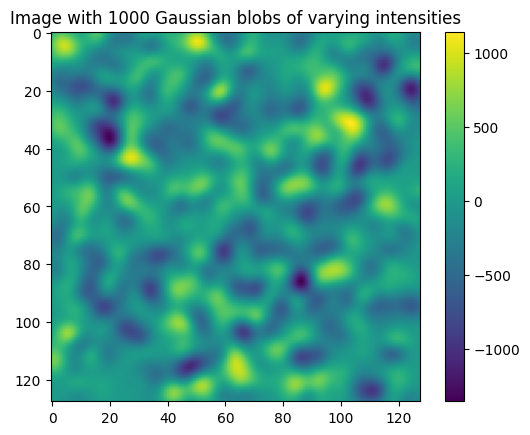

Training dataset created


In [10]:
for n in range(1):
    frame = np.zeros(shape=(128,128), dtype = np.float64)

    x = np.random.rand(N_DOTS)
    y = np.random.rand(N_DOTS)

    for i in range(1000):
        frame = frame + (np.random.randn() * make_blob([x[i], y[i]]))

    plt.imshow(frame)
    plt.colorbar()
    plt.title('Image with 1000 Gaussian blobs of varying intensities')
    plt.show()

    # img = Image.fromarray(frame)# .convert('RGB')

    # img.save(TRAIN_DIR_TO_WRITE + str(n) + '.jpg')

print("Training dataset created")

## Creating a validation dataset

In [12]:
# for n in range(N_VAL):
#     frame = np.zeros(shape=(128,128), dtype = np.float64)

#     x = np.random.randint(0, 128-RADIUS, size=N_DOTS)
#     y = np.random.randint(0, 128-RADIUS, size=N_DOTS)

#     for i in range(N_DOTS):
#         frame[x[i]:x[i]+RADIUS,  y[i]:y[i]+RADIUS] = CIRCLE
    
#     frame = frame * 255

#     img = Image.fromarray(frame).convert('RGB')
#     img.save(VAL_DIR_TO_WRITE + str(n) + '.jpg')

# print("Validation dataset created")